In [1]:
from google.colab.patches import cv2_imshow as show
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img =cv2.imread("/content/drive/MyDrive/dip_Images/Fig0309(a)(washed_out_aerial_image).tif")

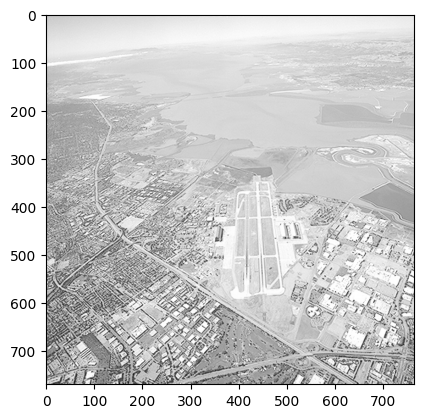

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

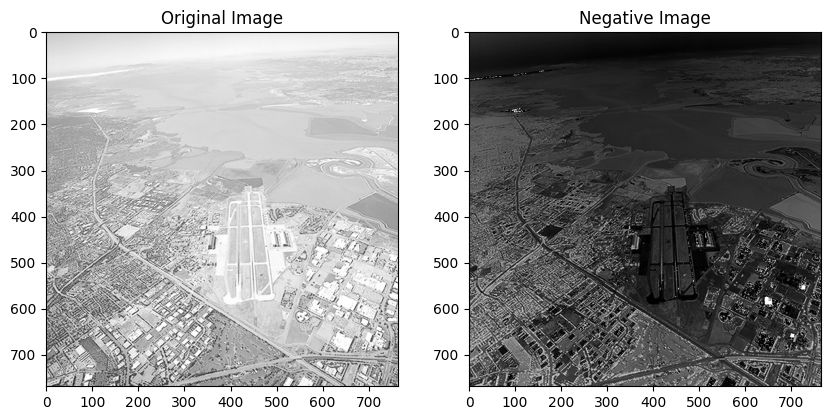

In [8]:
negative_img = 255 - img-1

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(negative_img, cmap="gray")
plt.title("Negative Image")

plt.show()


<ipython-input-34-39bfa5f3e70b>:11: RuntimeWarning: divide by zero encountered in log
  log_transformed_b = c * np.log(1 + b)
<ipython-input-34-39bfa5f3e70b>:13: RuntimeWarning: divide by zero encountered in log
  log_transformed_g = c * np.log(1 + g)
<ipython-input-34-39bfa5f3e70b>:15: RuntimeWarning: divide by zero encountered in log
  log_transformed_r = c * np.log(1 + r)
<ipython-input-34-39bfa5f3e70b>:18: RuntimeWarning: invalid value encountered in cast
  log_transformed_img = np.uint8(log_transformed_img)


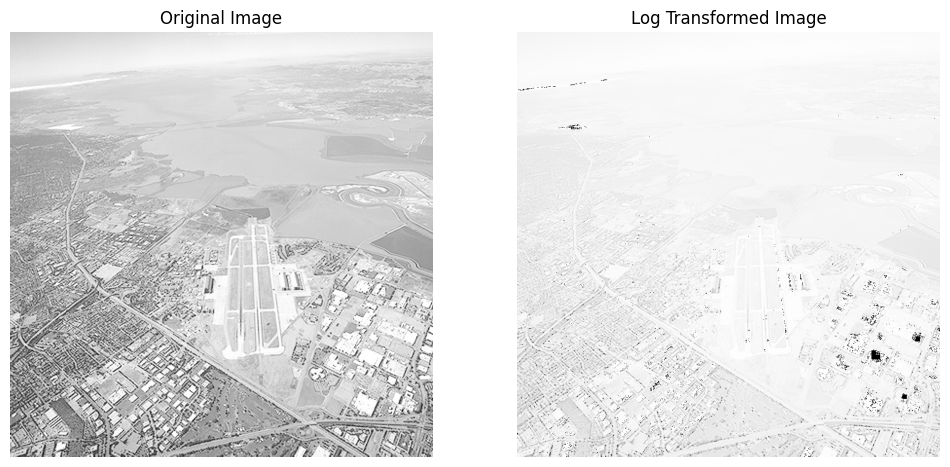

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0309(a)(washed_out_aerial_image).tif")

b, g, r = cv2.split(img)

c = 255 / np.log(1 + np.max(b))

log_transformed_b = c * np.log(1 + b)
c = 255 / np.log(1 + np.max(g))
log_transformed_g = c * np.log(1 + g)
c = 255 / np.log(1 + np.max(r))
log_transformed_r = c * np.log(1 + r)

log_transformed_img = cv2.merge([log_transformed_b, log_transformed_g, log_transformed_r])
log_transformed_img = np.uint8(log_transformed_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(log_transformed_img, cv2.COLOR_BGR2RGB))
plt.title("Log Transformed Image")
plt.axis('off')

plt.show()


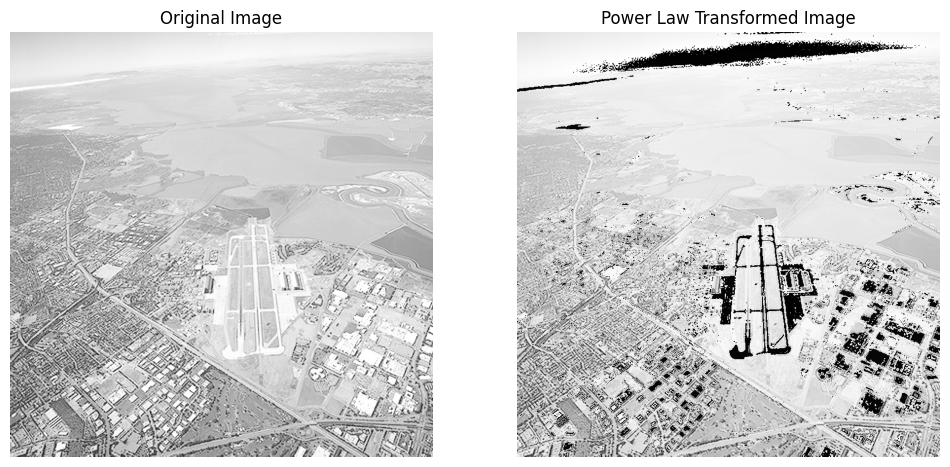

In [36]:
gamma = .2
b, g, r = cv2.split(img)

power_transformed_b = 256 * np.power(b, gamma)
power_transformed_g = 256 * np.power(g, gamma)
power_transformed_r = 256 * np.power(r, gamma)

power_transformed_img = cv2.merge([power_transformed_b, power_transformed_g, power_transformed_r])
power_transformed_img = np.uint8(power_transformed_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(power_transformed_img, cv2.COLOR_BGR2RGB))
plt.title("Power Law Transformed Image")
plt.axis('off')

plt.show()


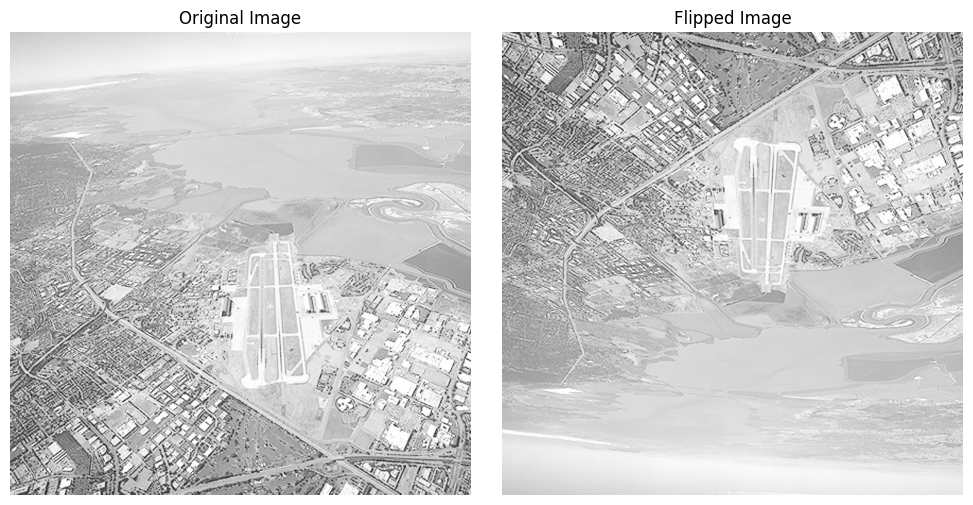

In [37]:
flipped_img = img.copy()

height, width, _ = img.shape

for i in range(height // 2):
    for j in range(width):
        flipped_img[i, j] = img[height - i - 1, j]
        flipped_img[height - i - 1, j] = img[i, j]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image')
plt.axis('off')

plt.tight_layout()
plt.show()